## Indeks silhouette

jest indeksem obliczanym dla każdego obiektu, wyrażającym na ile blisko temu obiektowi do wszystkich pozostałych z jego grupy w stosunku do wszystkich pozostałych z innej (najbliższej grupy).


$$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$$
​

gdzie:

- $a(i)$ to średnia odległość obserwacji $x_i$ od pozostałych z jej grupy (*cohesion* - spójność),
- $b(i)$ to najmniejsza ze średnich odległości do pozostałych grup (*separation* - rozdzelenie). 

In [1]:
import pandas as pd
import numpy as np
from plotnine import *

In [2]:
df = pd.DataFrame({"ai": np.arange(0.1, 5, 0.2), "bi": np.arange(4.9, 0, -0.2)})

In [3]:
df

,ai,bi
0,0.1,4.9
1,0.3,4.7
2,0.5,4.5
3,0.7,4.3
4,0.9,4.1
5,1.1,3.9
6,1.3,3.7
7,1.5,3.5
8,1.7,3.3
9,1.9,3.1


In [8]:
df['roznica'] = df.bi - df.ai
df['maks'] = df.max(axis = 1)
df['silh'] = df.roznica/df.maks

In [9]:
round(df.silh, 2)

0     0.98
1     0.94
2     0.89
3     0.84
4     0.78
5     0.72
6     0.65
7     0.57
8     0.48
9     0.39
10    0.28
11    0.15
12   -0.00
13   -0.15
14   -0.28
15   -0.39
16   -0.48
17   -0.57
18   -0.65
19   -0.72
20   -0.78
21   -0.84
22   -0.89
23   -0.94
24   -0.98
Name: silh, dtype: float64

In [10]:
df['silh_abs'] = df.silh.abs()

In [11]:
df

,ai,bi,roznica,maks,silh,silh_abs
0,0.1,4.9,4.800000e+00,4.9,9.795918e-01,9.795918e-01
1,0.3,4.7,4.400000e+00,4.7,9.361702e-01,9.361702e-01
2,0.5,4.5,4.000000e+00,4.5,8.888889e-01,8.888889e-01
3,0.7,4.3,3.600000e+00,4.3,8.372093e-01,8.372093e-01
4,0.9,4.1,3.200000e+00,4.1,7.804878e-01,7.804878e-01
5,1.1,3.9,2.800000e+00,3.9,7.179487e-01,7.179487e-01
6,1.3,3.7,2.400000e+00,3.7,6.486486e-01,6.486486e-01
7,1.5,3.5,2.000000e+00,3.5,5.714286e-01,5.714286e-01
8,1.7,3.3,1.600000e+00,3.3,4.848485e-01,4.848485e-01
9,1.9,3.1,1.200000e+00,3.1,3.870968e-01,3.870968e-01


## Interpretacja

Im bliższa $s(i)$  wartości 1, tym bardziej dany obiekt pasuje do swojej grupy, im bliższa wartości -1, tym bliżej temu obiektowi do grupy sąsiedniej. $s(i)$ bliskie 0 oznacza, że punkt znajduje się pomiędzy dwoma skupieniami.

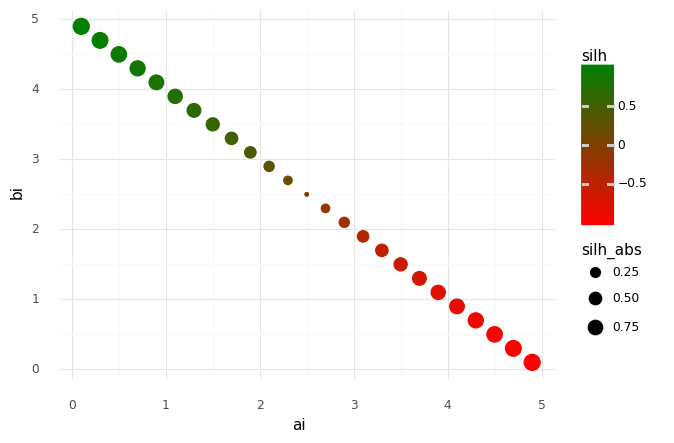

<ggplot: (110513592745)>

In [13]:
(ggplot(df,aes(x = 'ai', y='bi', color = 'silh', size = 'silh_abs'))+
 geom_point()+
 scale_color_gradient(low='red', high='green')+
 theme_minimal())

## Przykład

In [4]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from sklearn.datasets import make_blobs

In [15]:
n = 100

centra = [(-6,-6), (0,0), (6,6), (9,9)]

X, y = make_blobs(n_samples=n, n_features=2, centers=centra, cluster_std=1, random_state=0)

In [17]:
df = pd.DataFrame(X, columns = ['x1', 'x2'])
df['Grupy']= y

In [23]:
ks = range(2, 20)
sylwetki = []

for k in ks:
    km = KMeans(n_clusters=k).fit(df[['x1', 'x2']])
    sylwetki.append(silhouette_score(df[['x1', 'x2']], km.predict(df[['x1', 'x2']])))

In [24]:
sylwetki

[0.7112713659612682,
 0.7469616885065368,
 0.6594757955137404,
 0.5985759905965807,
 0.4847866585296767,
 0.4505428428850899,
 0.48945883270466517,
 0.382105323062744,
 0.3518526566800812,
 0.3561593292198056,
 0.3482406041534089,
 0.3925890035311303,
 0.35251045937878334,
 0.3802482146643632,
 0.37763465051415307,
 0.3468054822731492,
 0.3707474501729552,
 0.38097191524133267]

In [25]:
sylwetki_df = pd.DataFrame({'K': ks, 'Sylwetki' : sylwetki})

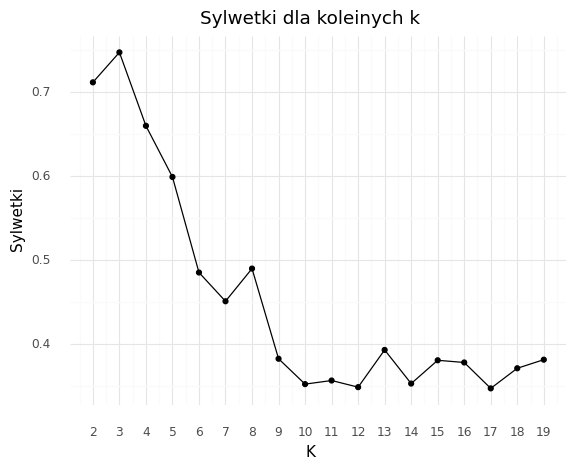

<ggplot: (110513648878)>

In [26]:
(ggplot(sylwetki_df, aes(x='K', y='Sylwetki'))+
 geom_point()+geom_line() +
 scale_x_continuous(breaks = ks)+
 theme_minimal()+
 labs(title = 'Sylwetki dla koleinych k'))